#Descripcion:Este programa utiliza una Recurrent NN  llamada Long Short Term Memory (LSTM).
Se busca predecir el valor de la acciones de la empresa
"Apple Inc", utilizando los datos de los ultimos 60 dias de las acciones.

In [ ]:
#Importaemos las librerias a utilizar
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
%%capture
#Por alguna razon no funcionaba el API de yahoo en datareader
!pip install fix-yahoo-finance;
import fix_yahoo_finance as yf;

In [ ]:
#Obtenenemos el dataframe de las acciones
df=yf.download('AAPL',start='2012-01-01', end='2023-09-08')
#Mostremos los datos
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466090,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533086,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672228,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804705,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784393,394024400
...,...,...,...,...,...,...
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.869995,60794500
2023-09-01,189.490005,189.919998,188.279999,189.460007,189.460007,45732600
2023-09-05,188.279999,189.979996,187.610001,189.699997,189.699997,45280000


In [ ]:
#Obtenenemos el numero de filas y columnas del dataset
df.shape

(2939, 6)

Text(0, 0.5, 'Close Price USD ($)')

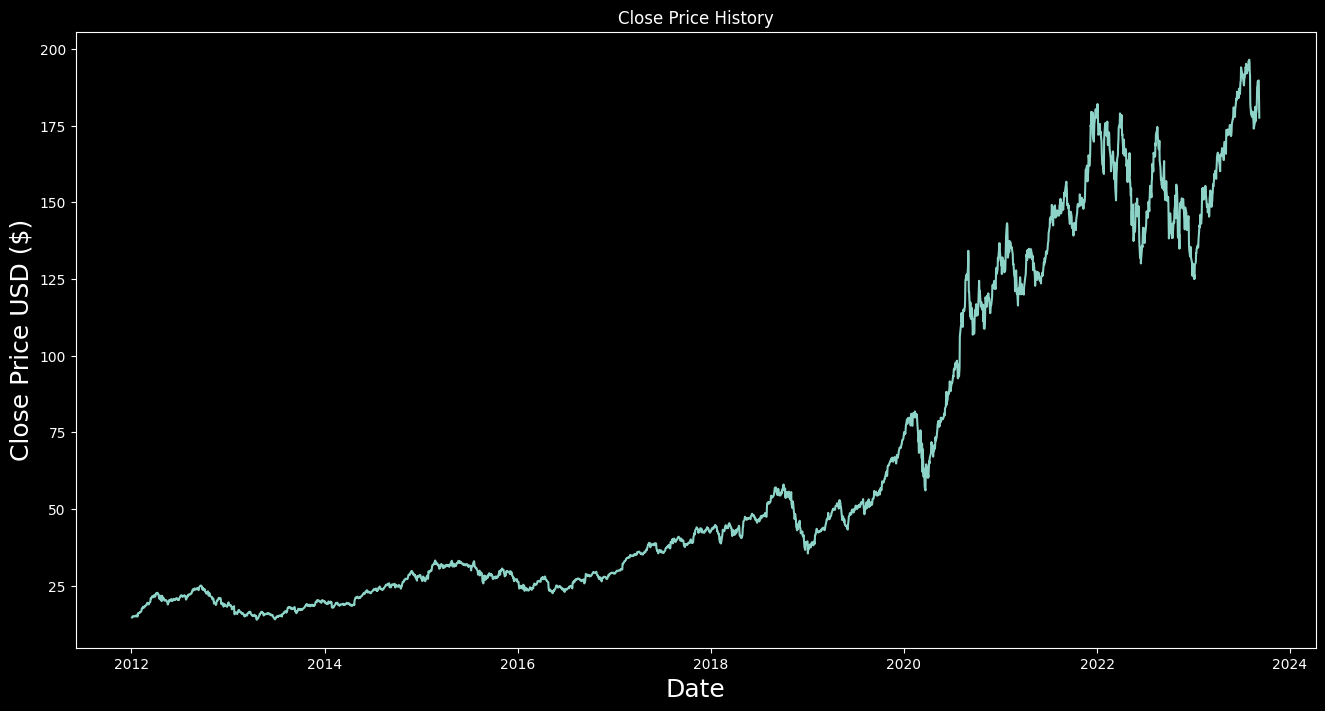

In [ ]:
#Visualizemos el precio de cierre
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot((df['Close']))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [ ]:
#Creemos un nuevo dataframe solo con la columna 'Close'
data=df.filter(['Close'])
#Convertimos el dataframe a un numpy array
dataset=data.values
#Obtenemos el numero de filas para el train
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2352

In [ ]:
#Escalemos los datos

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.9630142 ],
       [0.92580927],
       [0.89649457]])

In [ ]:
#Creamos la data set de entrenamiento
#Creamos la data escalada de entrenamiento
train_data=scaled_data[0:training_data_len,:]
#Separmos el entremaiento en x_train y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print("x_train=",x_train)
    print()
    print("y_train=",y_train)
    print()

x_train= [array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]

y_train= [0.04292113229660477]

x_train= [array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       

In [ ]:
#Convertimos x_train & y_train a numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)

In [ ]:
#Reshape a los datos
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2292, 60, 1)

In [ ]:
#Construimos el modelo LSTM
model1=Sequential()
model1.add(LSTM(10,return_sequences=True,input_shape=(x_train.shape[1],1) ))
model1.add(LSTM(10,return_sequences=False))
model1.add(Dense(5))
model1.add(Dense(5))
model1.add(Dense(5))
model1.add(Dense(1))

In [ ]:
model1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 60, 10)            480       
                                                                 
 lstm_41 (LSTM)              (None, 10)                840       
                                                                 
 dense_62 (Dense)            (None, 5)                 55        
                                                                 
 dense_63 (Dense)            (None, 5)                 30        
                                                                 
 dense_64 (Dense)            (None, 5)                 30        
                                                                 
 dense_65 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (

In [ ]:
#Definamos el optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

#Definamos la metrica
RMSE=tf.keras.metrics.RootMeanSquaredError()

#Compilamos el modelo
model1.compile(optimizer=adam,loss='mean_squared_error',metrics=[RMSE])

In [ ]:
#Entrenamos al modelo
#model.fit(x_train,y_train,batch_size=1,epochs=1)

In [ ]:
e=200
#Entrenamos al modelo
training_history1 = model1.fit(x_train, y_train, epochs=e, validation_split=0.15, batch_size=80, verbose=0)

# Learning Curve

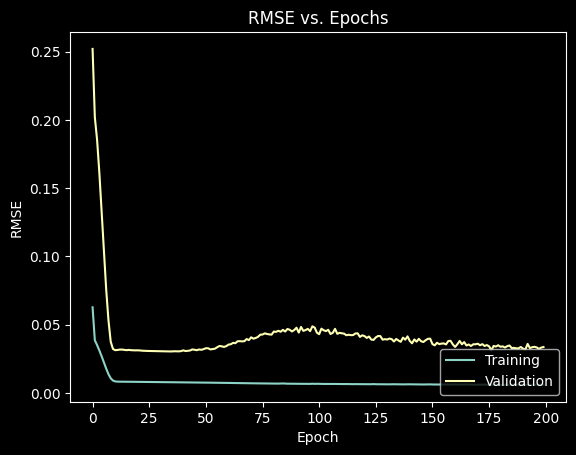

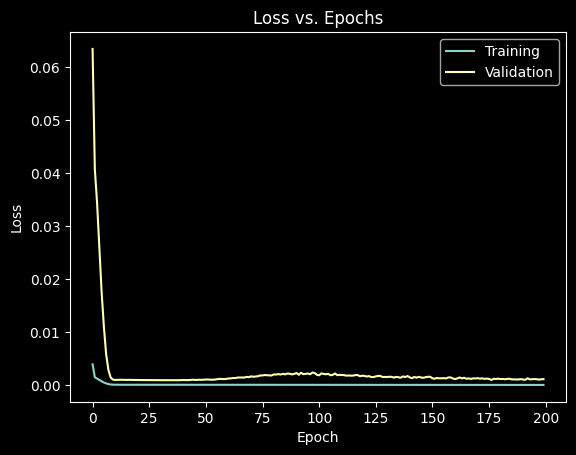

In [ ]:
def plot_acc_loss(training_history):
  plt.plot(training_history.history['root_mean_squared_error'])
  plt.plot(training_history.history['val_root_mean_squared_error'])
  # plt.ylim([0, 1])
  plt.title('RMSE vs. Epochs')
  plt.ylabel('RMSE')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.show()
  plt.plot(training_history.history['loss'])
  plt.plot(training_history.history['val_loss'])
  plt.title('Loss vs. Epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()

plot_acc_loss(training_history1)

#Introducing Dropout and Batch Normalization to reduce Overfitting


In [ ]:
#Construimos el modelo LSTM numero 2
def set_nn_model_architecture_2():
  model=Sequential()
  model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1) ))
  model.add(LSTM(50,return_sequences=False))
  model.add(Dropout(rate=0.3, seed=44, name='dropout1'))
  model.add(BatchNormalization(name='batch_normalization'))
  model.add(Dense(25))
  model.add(Dense(1))
  return model

model_2 = set_nn_model_architecture_2()

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 10)            480       
                                                                 
 lstm_3 (LSTM)               (None, 10)                840       
                                                                 
 dropout1 (Dropout)          (None, 10)                0         
                                                                 
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                      

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mean_squared_error',metrics=[RMSE])
training_history2 = model2.fit(x_train, y_train, epochs=e, validation_split=0.15, batch_size=80, verbose=0)

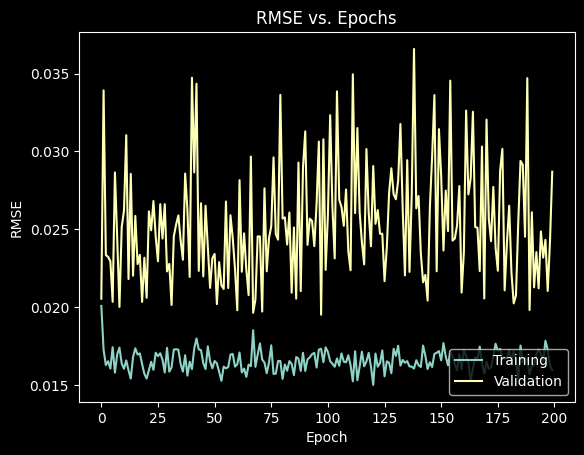

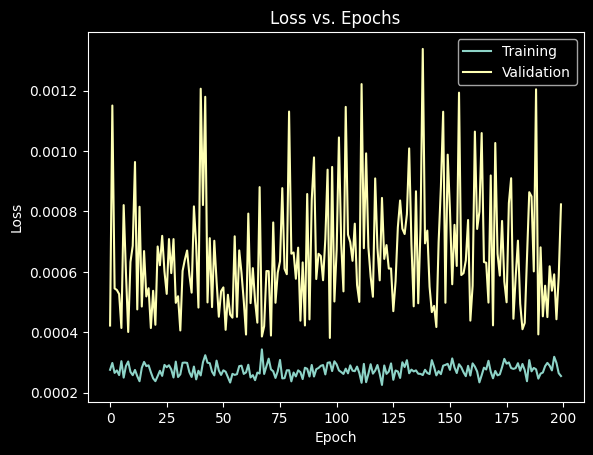

In [ ]:
plot_acc_loss(training_history2)

#Regularization using Callbacks: Earlystopping & learning rate reduction

In [ ]:
#Si nuestro modelo no ve mejoras despues de 3 epoch, se detien
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 30, mode =  "min")
#Reduce el learning rate un 20% si no ve mejors en 2 epochs
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(patience = 20, factor = 0.2)

In [ ]:
model3 = set_nn_model_architecture_2()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error',metrics=[RMSE])
training_history3 = model3.fit(x_train, y_train, epochs=e, validation_split=0.15, batch_size=80,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)

In [ ]:
model3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_45 (LSTM)              (None, 50)                20200     
                                                                 
 dropout1 (Dropout)          (None, 50)                0         
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_68 (Dense)            (None, 25)                1275      
                                                                 
 dense_69 (Dense)            (None, 1)                 26        
                                                     

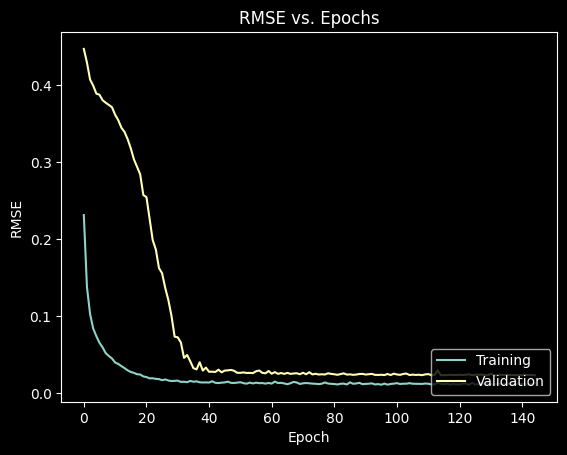

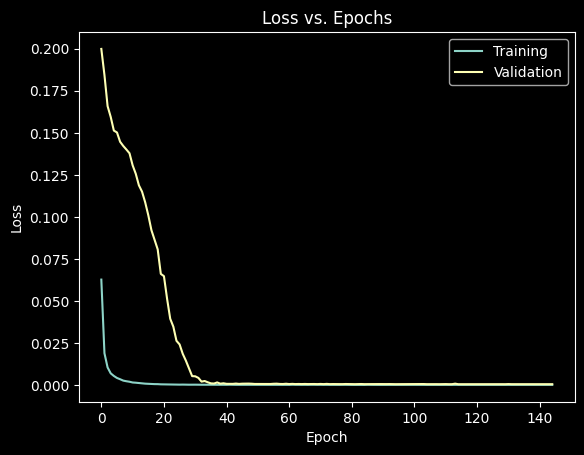

In [ ]:
plot_acc_loss(training_history3)

In [ ]:
#Creamos el testing data set
#Creamos un nuevo array que contenga los valores escalados del 2292 al 2352
test_data=scaled_data[training_data_len-60:,:]

#Creamos los data sets x_test & y_test
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convertimos los datos a numpy array
x_test=np.array(x_test)

In [ ]:
x_test.shape

(587, 60)

In [ ]:
#Reshape a los datop
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(587, 60, 1)

In [ ]:
#Obtener los valores predichos por el modelo
predictions=model3.predict(x_test)
predictions=scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 22ms/step


In [ ]:
#Obtenemos el (RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.5796637851903548

<ipython-input-236-e0f7c91c15f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


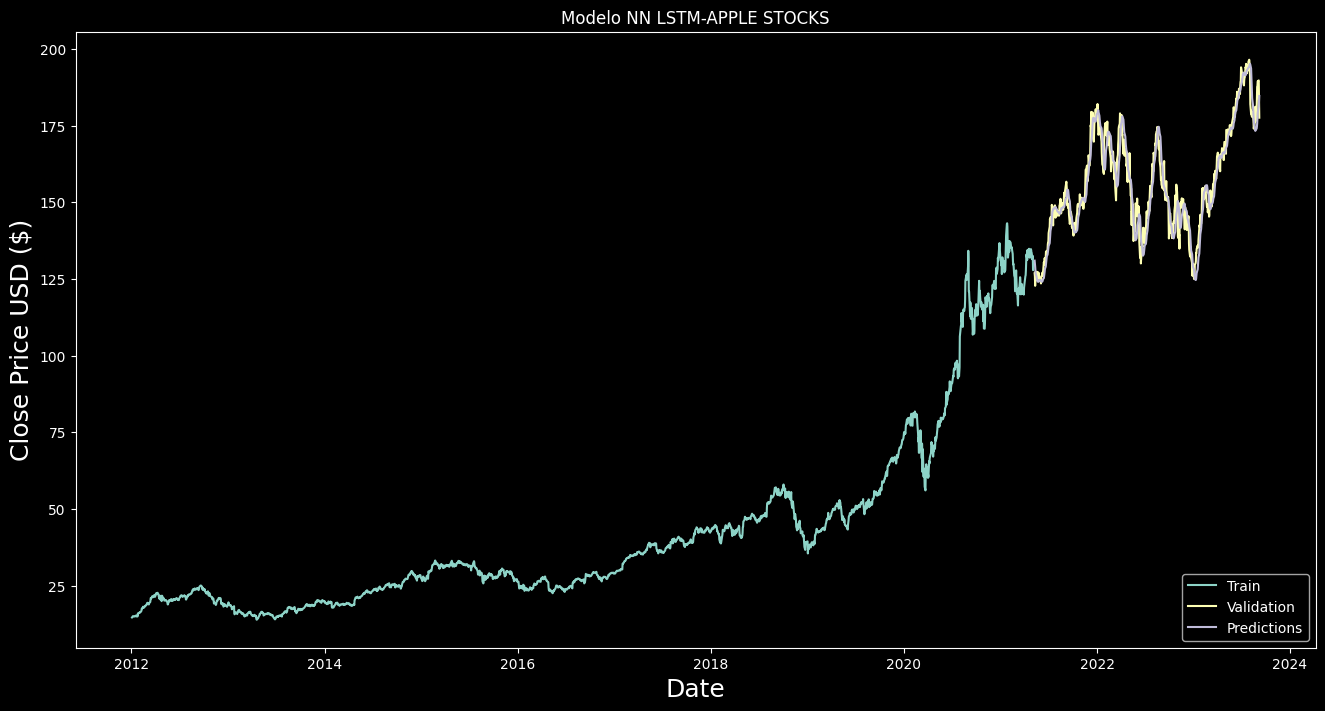

In [ ]:
#Grafiquemos los datos
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualizamos el modelo
plt.figure(figsize=(16,8))
plt.title('Modelo NN LSTM-APPLE STOCKS')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Mostremos los valores reales y los que predice nuestro modelo
valid

,Close,Predictions
Date,,
2021-05-10,126.849998,130.967789
2021-05-11,125.910004,130.094177
2021-05-12,122.769997,129.101212
2021-05-13,124.970001,127.828903
2021-05-14,127.449997,126.650780
...,...,...
2023-08-31,187.869995,177.302292
2023-09-01,189.460007,179.213943
2023-09-05,189.699997,181.289749


In [ ]:
#Obtengamos el valor predicho para el viernes 8 de septiembre
value=yf.download('AAPL',start='2012-01-01', end='2023-09-09')
#Hacemos un nuevo dataframe
new_df=value.filter(['Close'])
#Obtener los ultimos 60 valores y hacer el dataframe en array
last_60_days=new_df[-60:].values
#Escalamos los dato para valores entre 0 y 1
last_60_days_scaled=scaler.transform(last_60_days)
#Creamos una lista vacia
X_test=[]
#Adjuntar los ultimos 60 dias
X_test.append(last_60_days_scaled)
#Convertimos X_test a un numpy array
X_test=np.array(X_test)
#Reshape a los datos
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Obtener el valor predicho
pred_price=model3.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print()
print("Valor predicho el 8 de septiembre:",pred_price[0][0],"$")

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 80ms/step

Valor predicho el 8 de septiembre: 184.38437 $


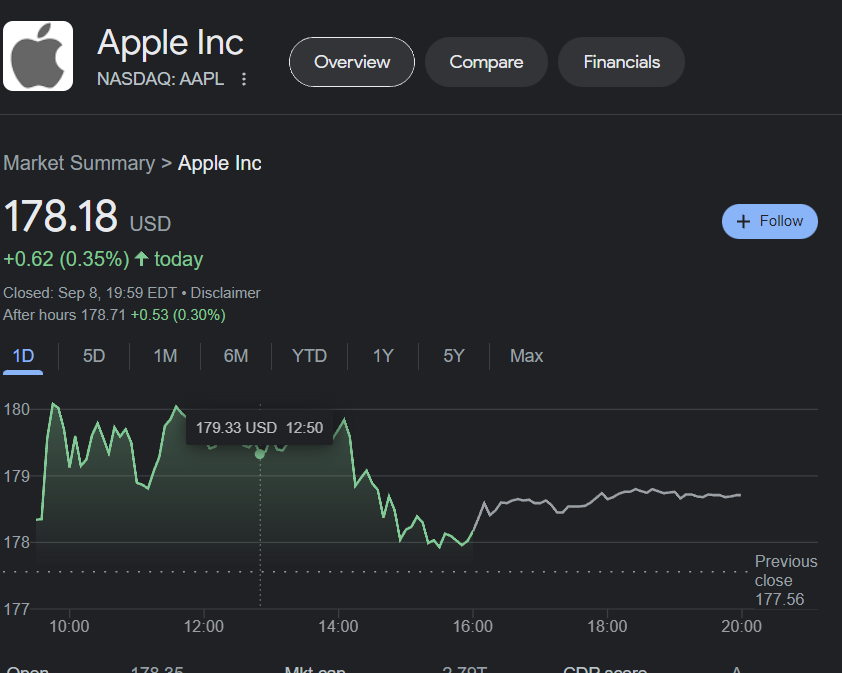

#Reporte

En este cuaderno, se desarrolló una Red Neuronal Recurrente (RNN), específicamente una Long Short Term Memory (LSTM), con el propósito de predecir los valores de las acciones de "Apple". La elección de esta arquitectura se basó en el conocimiento adquirido en clase, donde se destacó su eficacia para abordar problemas relacionados con series temporales.

Inicialmente, se configuró una red que consistía en dos capas LSTM, cada una con 10 neuronas, seguidas de tres capas densas, cada una con cinco neuronas. Dado que el objetivo era predecir un único valor de salida, se empleó una sola neurona en la capa de salida.

Para mejorar la precisión del modelo, se implementaron estrategias clave. Se introdujo la técnica de Dropout, que mitiga el sobreajuste al desconectar de forma aleatoria ciertas conexiones neuronales durante el entrenamiento. Asimismo, se incorporó Batch Normalization para estabilizar el proceso de entrenamiento y acelerar la convergencia del modelo. Adicionalmente, se utilizaron callbacks, como Early Stopping y la reducción de la tasa de aprendizaje, con el fin de prevenir el sobreajuste y optimizar el rendimiento del modelo a lo largo de múltiples épocas.

La métrica de Error Cuadrático Medio de Raíz (RMSE) se empleó para evaluar la precisión del modelo en la tarea de predicción de los precios de las acciones de Apple. Estas mejoras y enfoques se aplicaron en busca de obtener resultados más precisos y confiables en la predicción de series temporales.